In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 사용을 위해서 세팅

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# train 정보 가져오기

In [2]:
dataframe = pd.read_csv("train.csv")
dataframe.drop(columns='ID',inplace=True)
dataframe

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [3]:
dataframe.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [11]:
dataframe.describe(include='all')

,대출금액(만원),대출기간,근로기간,주택소유상태,연간소득(만원),부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금(만원),총상환이자(만원),총연체금액(만원),연체계좌수,대출등급
count,96294.000000,96294,96294,96294,9.629400e+04,96294.000000,96294.000000,96294,96294.000000,96294.000000,96294.000000,96294.000000,96294.000000,96294
unique,NaN,2,16,4,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,7
top,NaN,36 months,10+ years,MORTGAGE,NaN,NaN,NaN,부채 통합,NaN,NaN,NaN,NaN,NaN,B
freq,NaN,64479,31585,47934,NaN,NaN,NaN,55150,NaN,NaN,NaN,NaN,NaN,28817
mean,1830.399807,NaN,NaN,NaN,9.392672e+03,19.379590,25.304827,NaN,0.345681,82.250349,42.822825,0.005438,0.005805,NaN
std,1032.907561,NaN,NaN,NaN,9.956871e+03,33.569559,12.088566,NaN,0.919119,102.774526,44.021108,0.141477,0.079966,NaN
min,120.000000,NaN,NaN,NaN,0.000000e+00,0.000000,4.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1020.000000,NaN,NaN,NaN,5.760000e+03,12.650000,17.000000,NaN,0.000000,30.757200,13.461600,0.000000,0.000000,NaN
50%,1680.000000,NaN,NaN,NaN,7.800000e+03,18.740000,24.000000,NaN,0.000000,59.769600,28.700400,0.000000,0.000000,NaN
75%,2400.000000,NaN,NaN,NaN,1.128000e+04,25.540000,32.000000,NaN,0.000000,105.507600,57.021600,0.000000,0.000000,NaN


In [15]:
dataframe['대출기간'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [16]:
dataframe['대출기간'].value_counts()

 36 months    64479
 60 months    31815
Name: 대출기간, dtype: int64

# 수치형 칼럼, 범주형 칼럼 분류

In [4]:
numeric_columns=dataframe.select_dtypes('number').columns
object_columns=dataframe.select_dtypes('O').columns

# dataframe에서 ['대출금액','연간소득','총상환원금','총상환이자','총연체금액']을 금액단위를 (만원)으로 변경

In [5]:
columns=['대출금액','연간소득','총상환원금','총상환이자','총연체금액']

for col in columns:
    dataframe[col]=dataframe[col]/10000
    dataframe.rename(columns={col:col+'(만원)'},inplace=True)
dataframe


,대출금액(만원),대출기간,근로기간,주택소유상태,연간소득(만원),부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금(만원),총상환이자(만원),총연체금액(만원),연체계좌수,대출등급
0,1248.0,36 months,6 years,RENT,7200.0,18.90,15,부채 통합,0,0.0000,0.0000,0.0,0.0,C
1,1440.0,60 months,10+ years,MORTGAGE,13080.0,22.33,21,주택 개선,0,37.3572,23.4060,0.0,0.0,B
2,1200.0,36 months,5 years,MORTGAGE,9600.0,8.60,14,부채 통합,0,92.8644,15.1944,0.0,0.0,A
3,1440.0,36 months,8 years,MORTGAGE,13200.0,15.09,15,부채 통합,0,32.5824,15.3108,0.0,0.0,C
4,1800.0,60 months,Unknown,RENT,7173.6,25.39,19,주요 구매,0,22.8540,14.8956,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,1440.0,36 months,10+ years,MORTGAGE,21000.0,9.33,33,신용 카드,0,97.4580,49.2168,0.0,0.0,C
96290,2880.0,60 months,10+ years,MORTGAGE,13200.0,5.16,25,주택 개선,0,58.3728,85.5084,0.0,0.0,E
96291,1440.0,36 months,1 year,MORTGAGE,8400.0,11.24,22,신용 카드,0,148.9128,24.1236,0.0,0.0,A
96292,1560.0,36 months,5 years,MORTGAGE,6633.0,17.30,21,부채 통합,2,137.8368,81.8076,0.0,0.0,D


In [6]:
pd.crosstab(dataframe['대출기간'],dataframe['근로기간'])

근로기간,1 year,1 years,10+ years,10+years,2 years,3,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,<1 year,Unknown
대출기간,,,,,,,,,,,,,,,,
36 months,4350,38,20008,555,5799,69,5223,3834,3811,2597,2527,3156,2384,5375,254,4499
60 months,1899,18,11577,341,2651,20,2358,1754,1854,1277,1287,1732,1360,2399,116,1172


지금 현재 Column : 근로기간 해당 칼럼이 현재 이상한 것 같다. 자세하게 더 봐야할 필요성이 있어보임.

통일시켜야할 필요성을 확인

In [7]:
dataframe[(dataframe['근로기간']=='1 years')].describe()

,대출금액(만원),연간소득(만원),부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금(만원),총상환이자(만원),총연체금액(만원),연체계좌수
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000
mean,1765.875000,8717.464286,19.903929,24.607143,0.285714,66.343329,38.644050,0.0,0.017857
std,1038.968371,4639.455603,9.043268,12.416526,0.594346,60.980265,43.482245,0.0,0.133631
min,300.000000,3000.000000,3.310000,4.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,960.000000,5346.000000,13.170000,15.750000,0.000000,28.784700,12.273300,0.0,0.000000
50%,1500.000000,7380.000000,19.575000,22.000000,0.000000,51.009600,25.728600,0.0,0.000000
75%,2330.250000,10920.000000,28.730000,31.500000,0.000000,83.389200,46.631100,0.0,0.000000
max,4200.000000,21000.000000,36.760000,63.000000,2.000000,278.944800,184.790400,0.0,1.000000


In [8]:
dataframe[(dataframe['근로기간']=='1 year')].describe()

,대출금액(만원),연간소득(만원),부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금(만원),총상환이자(만원),총연체금액(만원),연체계좌수
count,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000
mean,1738.035526,8809.889601,18.719027,24.215875,0.358617,81.770234,40.628661,0.003580,0.006721
std,1002.983002,6128.204212,8.626130,12.244141,0.961930,117.073215,42.174287,0.099433,0.081713
min,120.000000,960.000000,0.470000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,960.000000,5160.000000,12.280000,15.000000,0.000000,29.653200,12.975600,0.000000,0.000000
50%,1458.000000,7200.000000,18.090000,22.000000,0.000000,56.630400,27.294000,0.000000,0.000000
75%,2400.000000,10800.000000,24.870000,31.000000,0.000000,102.783600,53.413200,0.000000,0.000000
max,4200.000000,120000.000000,46.710000,90.000000,14.000000,3979.389600,415.470000,4.138800,1.000000


In [9]:
dataframe[(dataframe['근로기간']=='1 years') | (dataframe['근로기간']=='1 year')].describe()

,대출금액(만원),연간소득(만원),부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금(만원),총상환이자(만원),총연체금액(만원),연체계좌수
count,6305.000000,6305.000000,6305.000000,6305.000000,6305.000000,6305.000000,6305.000000,6305.000000,6305.000000
mean,1738.282791,8809.068694,18.729551,24.219350,0.357970,81.633214,40.611034,0.003548,0.006820
std,1003.226414,6116.301673,8.629889,12.244739,0.959281,116.700134,42.182941,0.098991,0.082308
min,120.000000,960.000000,0.470000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,960.000000,5160.000000,12.290000,15.000000,0.000000,29.653200,12.909600,0.000000,0.000000
50%,1458.000000,7200.000000,18.100000,22.000000,0.000000,56.556000,27.278400,0.000000,0.000000
75%,2400.000000,10800.000000,24.880000,31.000000,0.000000,102.632400,53.385600,0.000000,0.000000
max,4200.000000,120000.000000,46.710000,90.000000,14.000000,3979.389600,415.470000,4.138800,1.000000


1 year 와 1 years 각각 mean이 크게 다르지 않고 합쳤을 때의 mean값이 크게 변하지 않고 Q1과 Q3 분위수가 크게 다르지 않아 합치는 것으로 판단

In [10]:
print(f'범주형 카테고리 데이터 칼럼 개수 : {len(object_columns)}')
print(f'수치형 데이터의 개수: {len(numeric_columns)}')

범주형 카테고리 데이터 칼럼 개수 : 5
수치형 데이터의 개수: 9


카테고리형 범주형 데이터 칼럼 개수는 5개고, 

수치형 데이터의 칼럼 개수는 9개 이다.

In [47]:
dataframe.corr()

,대출금액(만원),연간소득(만원),부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금(만원),총상환이자(만원),총연체금액(만원),연체계좌수
대출금액(만원),1.000000,0.273975,0.002263,0.212309,-0.014775,0.379061,0.615680,0.011853,0.000182
연간소득(만원),0.273975,1.000000,-0.044594,0.145403,0.040260,0.137552,0.114311,0.000333,0.009854
부채_대비_소득_비율,0.002263,-0.044594,1.000000,0.058830,0.000699,-0.016180,0.018565,0.000711,0.000051
총계좌수,0.212309,0.145403,0.058830,1.000000,0.112092,0.083615,0.116299,0.000037,0.023652
최근_2년간_연체_횟수,-0.014775,0.040260,0.000699,0.112092,1.000000,-0.010048,0.008095,0.004612,0.133632
총상환원금(만원),0.379061,0.137552,-0.016180,0.083615,-0.010048,1.000000,0.412385,0.015379,-0.005190
총상환이자(만원),0.615680,0.114311,0.018565,0.116299,0.008095,0.412385,1.000000,0.057838,0.009257
총연체금액(만원),0.011853,0.000333,0.000711,0.000037,0.004612,0.015379,0.057838,1.000000,0.006620
연체계좌수,0.000182,0.009854,0.000051,0.023652,0.133632,-0.005190,0.009257,0.006620,1.000000


<Figure size 640x480 with 0 Axes>

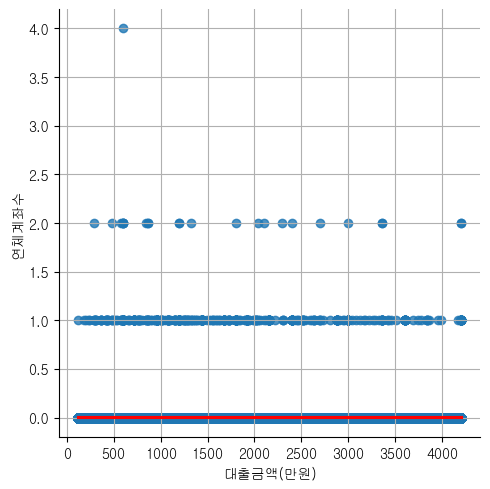

In [52]:
plt.figure()
sns.lmplot(data=dataframe,x='대출금액(만원)',y='연체계좌수',line_kws={'color':'red'})
plt.grid()
plt.show()